X shape: (13067, 400)
y shape: (13067,)


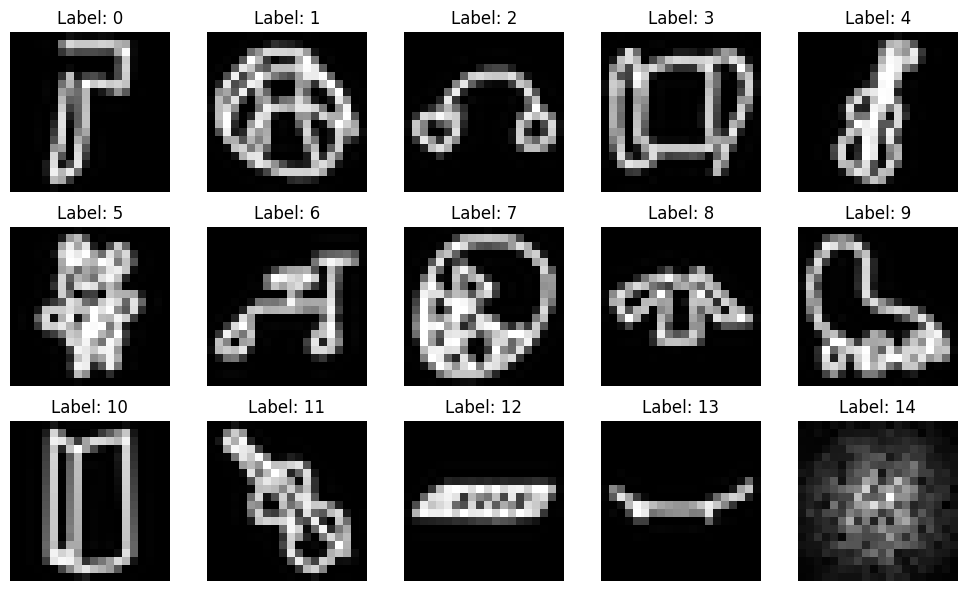

Antall klasser: 15
Fordeling: Counter({np.uint8(11): 1601, np.uint8(5): 1362, np.uint8(4): 1022, np.uint8(1): 900, np.uint8(8): 888, np.uint8(13): 884, np.uint8(14): 873, np.uint8(6): 858, np.uint8(9): 834, np.uint8(2): 804, np.uint8(10): 782, np.uint8(12): 702, np.uint8(7): 557, np.uint8(0): 546, np.uint8(3): 454})


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

data = np.load("dataset.npz")
X, y = data["X"], data["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)

unique_labels = np.unique(y)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    ax = axes.flat[i]
    ax.imshow(X[idx].reshape(20, 20), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

print("Antall klasser:", len(np.unique(y)))
print("Fordeling:", Counter(y))


In [3]:
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


===== Logistic Regression =====
Best parameters: {'C': 0.1, 'penalty': 'l2'}
CV Accuracy: 0.704104627029946
Test Accuracy: 0.6951032899770466
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       109
           1       0.52      0.56      0.54       180
           2       0.85      0.84      0.85       161
           3       0.37      0.24      0.29        91
           4       0.62      0.60      0.61       204
           5       0.76      0.79      0.77       273
           6       0.76      0.76      0.76       172
           7       0.49      0.32      0.38       111
           8       0.75      0.80      0.77       178
           9       0.80      0.77      0.78       167
          10       0.59      0.61      0.60       156
          11       0.64      0.68      0.66       320
          12       0.50      0.54      0.52       140
          13       0.74      0.85      0.79       177
          14       0.98      1.00      0.99   

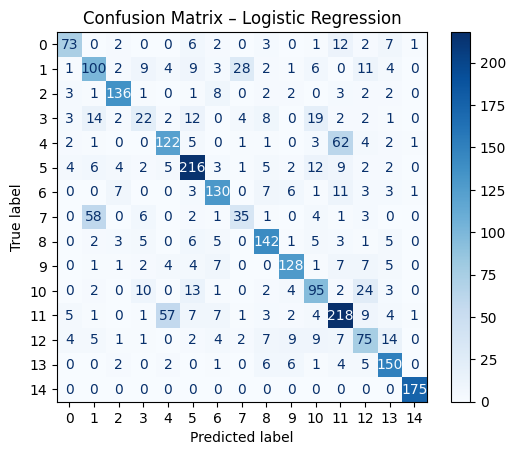

In [12]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='saga'), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("\n===== Logistic Regression =====")
print("Best parameters:", grid_lr.best_params_)
print("CV Accuracy:", grid_lr.best_score_)

y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


===== SVM =====
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
CV Accuracy: 0.786952237774559
Test Accuracy: 0.7872991583779648
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.64      0.71      0.67       180
           2       0.92      0.88      0.90       161
           3       0.64      0.54      0.58        91
           4       0.60      0.58      0.59       204
           5       0.87      0.87      0.87       273
           6       0.87      0.90      0.88       172
           7       0.64      0.44      0.52       111
           8       0.91      0.88      0.89       178
           9       0.84      0.84      0.84       167
          10       0.78      0.83      0.80       156
          11       0.67      0.71      0.69       320
          12       0.72      0.75      0.73       140
          13       0.85      0.88      0.86       177
          14       1.00      1.00      1.00  

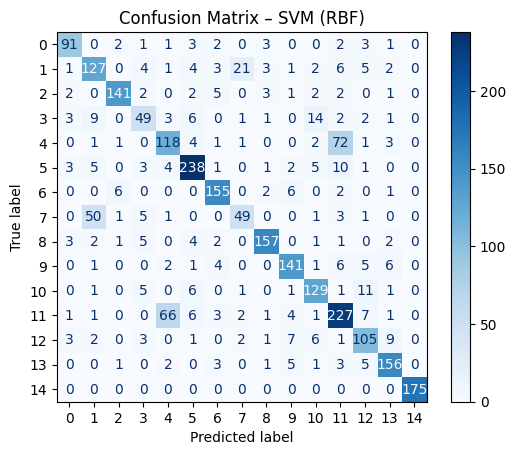

In [5]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
print("\n===== SVM =====")
print("Best parameters:", grid_svm.best_params_)
print("CV Accuracy:", grid_svm.best_score_)

y_pred_svm = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression – test accuracy: {accuracy_lr:.3f}")
print(f"SVM – test accuracy: {accuracy_svm:.3f}")

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

k_values = [50, 100, 200, 300]
results = []

for k in k_values:
    print(f"=== PCA with {k} components ===")
    pca=PCA(n_components=k)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    best_svm.fit(X_train_pca, y_train)
    y_pred_pca = best_svm.predict(X_test_pca)
    svm_acc = accuracy_score(y_test, y_pred_pca)

    results.append({
        'k' : k,
        'SVM accuracy' : svm_acc
    })

table_results = pd.DataFrame(results)
print(table_results)